In [2]:
from huggingface_hub import model_info
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

# LoRA weights ~3 MB
model_path = "/home/huram-abi/CS236_Project/lora_output1"

#info = model_info(model_path)
model_base = "CompVis/stable-diffusion-v1-4" #info.cardData["base_model"]
#print(model_base)   # CompVis/stable-diffusion-v1-4


pipe = StableDiffusionPipeline.from_pretrained(model_base, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

pipe.unet.load_attn_procs(model_path)
pipe.to("cuda")

2023-12-06 04:05:46.877913: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please submit your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
For effortless bug reporting copy-paste your error into this form: https://docs.google.com/forms/d/e/1FAIpQLScPB8emS3Thkp66nvqwmjTEgxp8Y9ufuWTzFyr9kJ5AoI47dQ/viewform?usp=sf_link
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 7.5
CUDA SETUP: Detected CUDA version 113
CUDA SETUP: Loading binary /opt/conda/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda113.so...


/opt/conda/lib/python3.10/site-packages/bitsandbytes/cuda_setup/paths.py:93: UserWarning: /opt/conda did not contain libcudart.so as expected! Searching further paths...
  warn(


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.25.0.dev0",
  "_name_or_path": "CompVis/stable-diffusion-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "DPMSolverMultistepScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/25 [00:00<?, ?it/s]

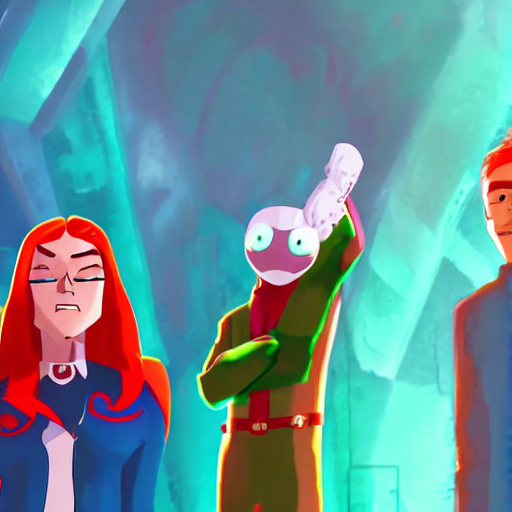

In [36]:
image = pipe("Earth-65 animation style", num_inference_steps=25).images[0]
image

In [ ]:
image.save("Earth-65_animation_style_v2.png")